https://github.com/mjingram/Linear_Mixed_Effects_Models_in_R/blob/master/FinalProjAnalysis.Rmd

https://github.com/jknowles/merTools/blob/master/vignettes/Using_predictInterval.Rmd

http://www.rensenieuwenhuis.nl/r-sessions-16-multilevel-model-specification-lme4/
https://rpsychologist.com/r-guide-longitudinal-lme-lmer
https://cran.r-project.org/web/packages/merTools/merTools.pdf

https://lme4.r-forge.r-project.org/book/Ch4.pdf   check

In [1]:
library(lme4)
library(ggplot2)
d <- sleepstudy
d$Subject <- factor(rep(1:18, each=10))

Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [7]:
install.packages("emmeans")
library(emmeans)

package 'emmeans' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpagPUeK\downloaded_packages


Warning message:
"package 'emmeans' was built under R version 3.6.3"

In [2]:
m <- lmer(Reaction~factor(Days)+(1|Subject), data=lme4::sleepstudy)
anova(m)

,npar,Sum Sq,Mean Sq,F value
factor(Days),9,166235.1,18470.57,18.7027


In [8]:
m.emm <- emmeans(m, "Days")
m.emm

 Days emmean   SE df lower.CL upper.CL
    0    257 11.5 42      234      280
    1    264 11.5 42      241      288
    2    265 11.5 42      242      288
    3    283 11.5 42      260      306
    4    289 11.5 42      266      312
    5    309 11.5 42      285      332
    6    312 11.5 42      289      335
    7    319 11.5 42      296      342
    8    337 11.5 42      314      360
    9    351 11.5 42      328      374

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

In [12]:
contrast(m.emm, 'tukey') %>%
  broom::tidy() %>%
  head(6)

term,contrast,null.value,estimate,std.error,df,statistic,adj.p.value
Days,0 - 1,0,-7.843950,10.47531,153,-0.7488038,9.991104e-01
Days,0 - 2,0,-8.710094,10.47531,153,-0.8314882,9.979714e-01
Days,0 - 3,0,-26.340206,10.47531,153,-2.5145044,2.692482e-01
Days,0 - 4,0,-31.997617,10.47531,153,-3.0545756,7.699985e-02
Days,0 - 5,0,-51.866650,10.47531,153,-4.9513251,8.267238e-05
Days,0 - 6,0,-55.526450,10.47531,153,-5.3006991,1.728837e-05


In [3]:
fm1 <- lmer(Reaction ~ Days + (Days|Subject), d)
summary(fm1)
d <- rbind(sleepstudy, sleepstudy)
d$Subject <- factor(rep(1:36, each=10))
d$Reaction <- ifelse(d$Subject %in% 19:36, NA, d$Reaction)
d$predicted <- predict (fm1, newdata=d, allow.new.levels=T)
d$simulated <- simulate(fm1, seed=1, newdata=d[-1], re.form=NA,
                        allow.new.levels=T)$sim_1

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: d

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4634  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 612.10   24.741       
          Days         35.07    5.922   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.825  36.838
Days          10.467      1.546   6.771

Correlation of Fixed Effects:
     (Intr)
Days -0.138

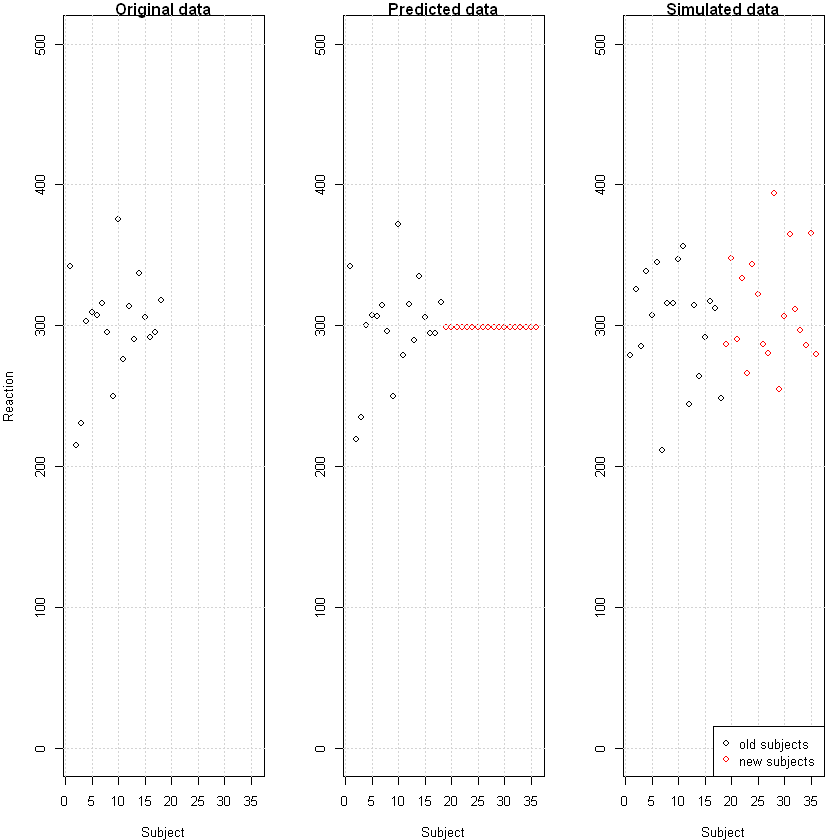

In [4]:
f <- function(x, ...) {
    plot(x, xlab="Subject", ylim=c(0, 500), ...)
    grid()
}
par(mfrow=c(1,3), mar=c(4,4,1,1))
with(d, f(tapply(Reaction,  Subject, mean), main="Original data", ylab="Reaction", xlim=c(1, 36)))
with(d, f(tapply(predicted, Subject, mean), main="Predicted data", ylab="", col=rep(1:2, each=18)))
with(d, f(tapply(simulated, Subject, mean), main="Simulated data", ylab="", col=rep(1:2, each=18)))
legend("bottomright", pch=c(1,1), col=1:2, c("old subjects", "new subjects"), bg="white")

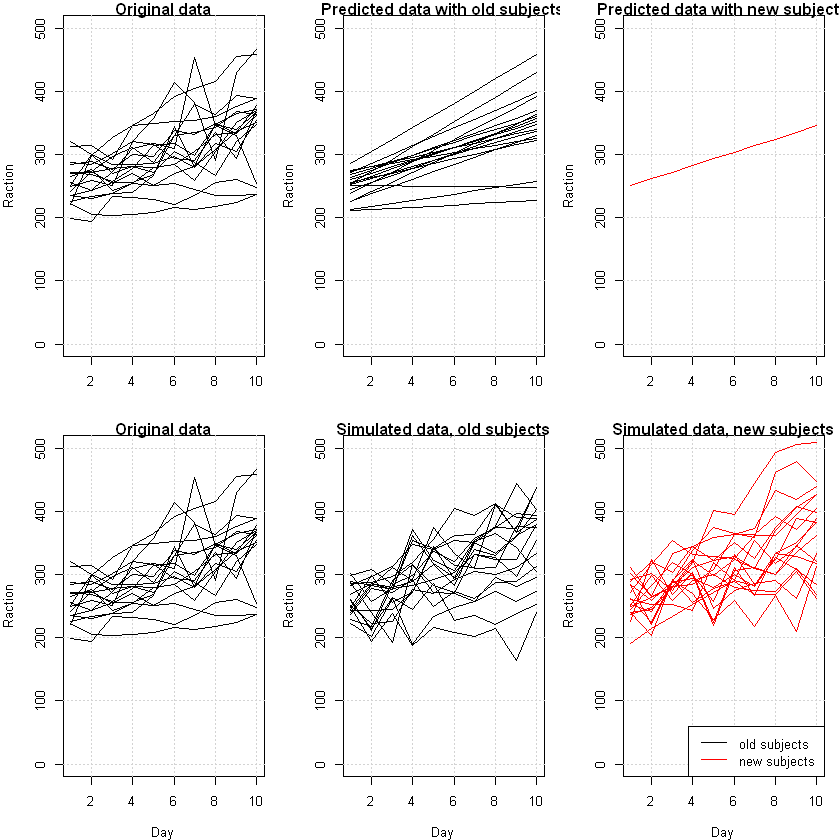

In [6]:
x <- with(d, as.matrix(tapply(Reaction,  list(Subject, Days), mean), ncol=9))
y <- with(d, as.matrix(tapply(predicted, list(Subject, Days), mean), ncol=9))
z <- with(d, as.matrix(tapply(simulated, list(Subject, Days), mean), ncol=9))

f <- function(xlab="Day", ...) {
    plot(c(1, 10), c(0, 500), ylab="Raction", xlab=xlab, t="n", ...)
    grid()
}
par(mfrow=c(2,3), mar=c(4,4,1,1))

f(main="Original data", "")
for (i in 1:18)
  lines(x[i,])
f(main="Predicted data with old subjects", "")
for (i in 1:18)
  lines(y[i,])
f(main="Predicted data with new subjects", "")
for (i in 19:36)
  lines(y[i,], col="red")
f(main="Original data")
for (i in 1:18)
  lines(x[i,])
f(main="Simulated data, old subjects")
for (i in 1:18)
  lines(z[i,])
f(main="Simulated data, new subjects")
for (i in 19:36)
  lines(z[i,], col="red")
legend("bottomright", lty=c(1,1), col=1:2, c("old subjects", "new subjects"), bg="white")

In [4]:
library(lme4)
library(ggplot2)
## Load Data and EDA
sleepDat<-sleepstudy

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [22]:
library(lme4)
install.packages("equatiomatic")
library(equatiomatic)
fm1 <- lmer(Reaction ~ Days + (Days|Subject), sleepDat)
equatiomatic::extract_eq(fm1)

also installing the dependencies 'TMB', 'cubelyr', 'broom.mixed'



package 'TMB' successfully unpacked and MD5 sums checked
package 'cubelyr' successfully unpacked and MD5 sums checked
package 'broom.mixed' successfully unpacked and MD5 sums checked
package 'equatiomatic' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpM31Mjd\downloaded_packages


Warning message:
"package 'equatiomatic' was built under R version 3.6.3"Warning message in checkMatrixPackageVersion():
"Package version inconsistency detected.
TMB was built with Matrix version 1.3.2
Current Matrix version is 1.2.17
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package"Registered S3 method overwritten by 'broom.mixed':
  method      from 
  tidy.gamlss broom


$$
\begin{aligned}
  \operatorname{Reaction}_{i}  &\sim N \left(\alpha_{j[i]} + \beta_{1j[i]}(\operatorname{Days}), \sigma^2 \right) \\    
\left(
  \begin{array}{c} 
    \begin{aligned}
      &\alpha_{j} \\
      &\beta_{1j}
    \end{aligned}
  \end{array}
\right)
  &\sim N \left(
\left(
  \begin{array}{c} 
    \begin{aligned}
      &\mu_{\alpha_{j}} \\
      &\mu_{\beta_{1j}}
    \end{aligned}
  \end{array}
\right)
, 
\left(
  \begin{array}{cc}
     \sigma^2_{\alpha_{j}} & \rho_{\alpha_{j}\beta_{1j}} \\ 
     \rho_{\beta_{1j}\alpha_{j}} & \sigma^2_{\beta_{1j}}
  \end{array}
\right)
 \right)
    \text{, for Subject j = 1,} \dots \text{,J}
\end{aligned}
$$

In [2]:
head(sleepDat)

Reaction,Days,Subject
249.5600,0,308
258.7047,1,308
250.8006,2,308
321.4398,3,308
356.8519,4,308
414.6901,5,308


`geom_smooth()` using formula 'y ~ x'


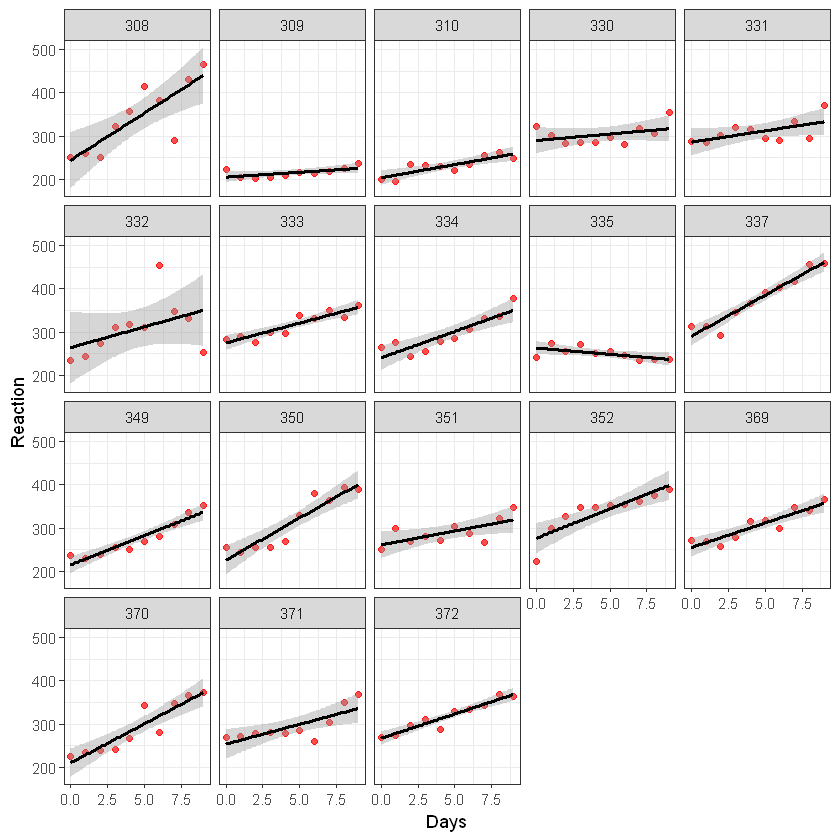

In [6]:
ggplot(sleepDat, aes(x = Days, y = Reaction)) + geom_point(color = "red", alpha = 0.7) + geom_smooth(method = "lm", color = "black") + theme_bw() + facet_wrap(~Subject)

`geom_smooth()` using formula 'y ~ x'


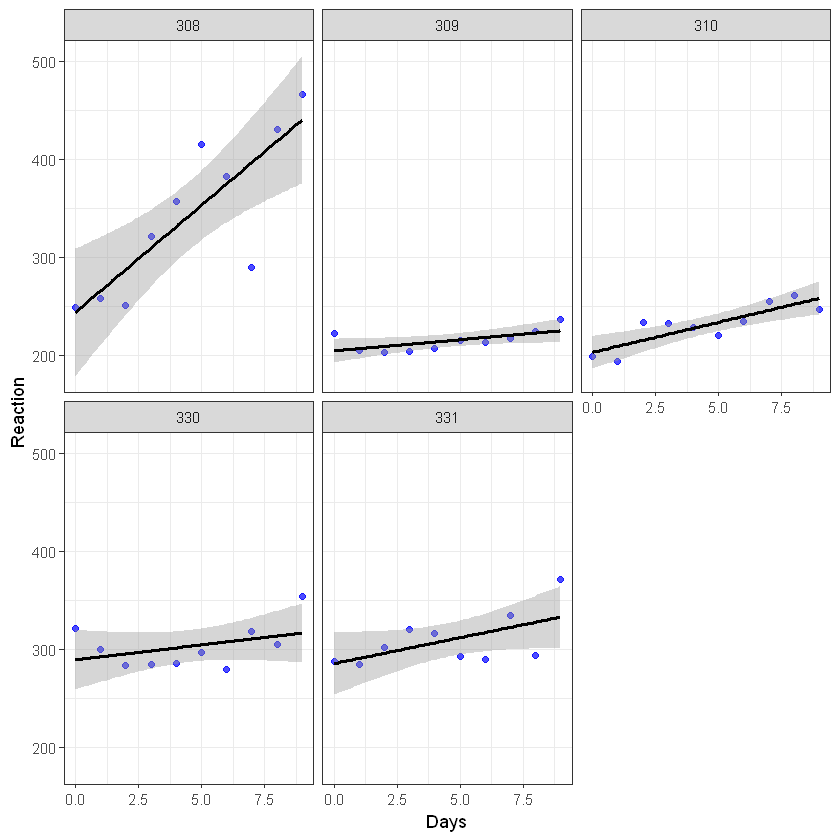

In [7]:
ggplot(sleepDat[1:50,], aes(x = Days, y = Reaction)) + geom_point(color = "blue", alpha = 0.7) + geom_smooth(method = "lm", color = "black") + theme_bw() + facet_wrap(~Subject)

# Intra-Class Correlation

In [8]:
summary(null <- lmer(Reaction ~ 1 + (1|Subject), data = sleepDat))

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ 1 + (1 | Subject)
   Data: sleepDat

REML criterion at convergence: 1904.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4983 -0.5501 -0.1476  0.5123  3.3446 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 1278     35.75   
 Residual             1959     44.26   
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)   298.51       9.05   32.98

In [10]:
install.packages("performance")
library(performance)
performance::icc(null)

also installing the dependencies 'insight', 'bayestestR'




  There is a binary version available but the source version is later:
        binary source needs_compilation
insight 0.12.0 0.13.1             FALSE

package 'bayestestR' successfully unpacked and MD5 sums checked
package 'performance' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpM31Mjd\downloaded_packages


installing the source package 'insight'

Warning message:
"package 'performance' was built under R version 3.6.3"

# Intraclass Correlation Coefficient

     Adjusted ICC: 0.395
  Conditional ICC: 0.395

In [11]:
library(tidyverse)
install.packages("sjPlot")
library(sjPlot)
library(lme4) 

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x tidyr::pack()   masks Matrix::pack()
x tidyr::unpack() masks Matrix::unpack()


package 'sjPlot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpagPUeK\downloaded_packages


Warning message:
"package 'sjPlot' was built under R version 3.6.3"Learn more about sjPlot with 'browseVignettes("sjPlot")'.


In [15]:
model1 = lmer(Reaction ~ Days + (1 | Subject), data=sleepDat)
tab_model(model1)

In [20]:
library(nlme)
getVarCov(model1, individuals = 1, type = "marginal")


Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

The following object is masked from 'package:lme4':

    lmList



ERROR: Error in UseMethod("getVarCov"): no applicable method for 'getVarCov' applied to an object of class "c('lmerMod', 'merMod')"


In [17]:
m_rs = lmer(Reaction ~ Days + (1 + Days| Subject), data=sleepDat)
tab_model(m_rs)

In [18]:
base = lmer(Reaction ~ (1 | Subject), data=sleepDat)
m1 = lmer(Reaction ~ Days + (1 | Subject), data=sleepDat)
m2 = lmer(Reaction ~ Days + (1 + Days| Subject), data=sleepDat)
tab_model(base,m1,m2)

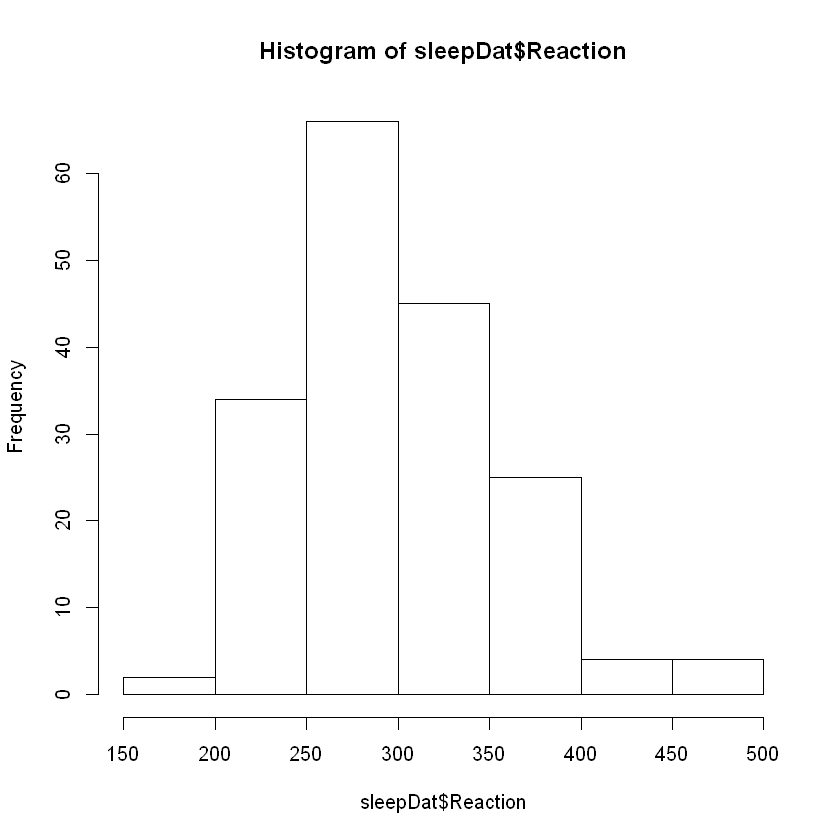

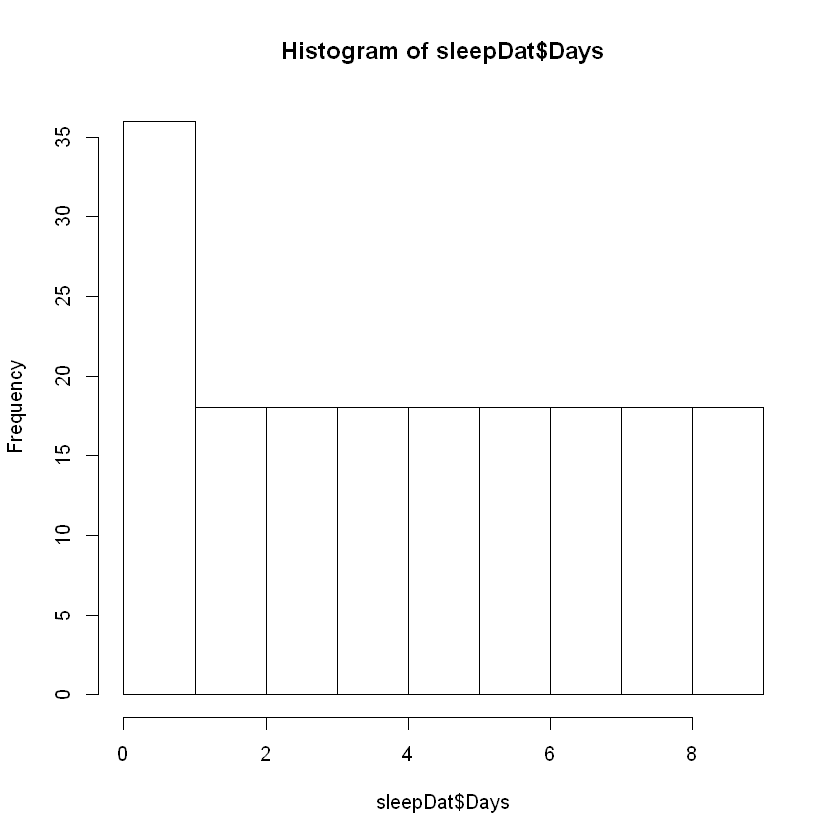

In [3]:
hist(sleepDat$Reaction)
hist(sleepDat$Days)

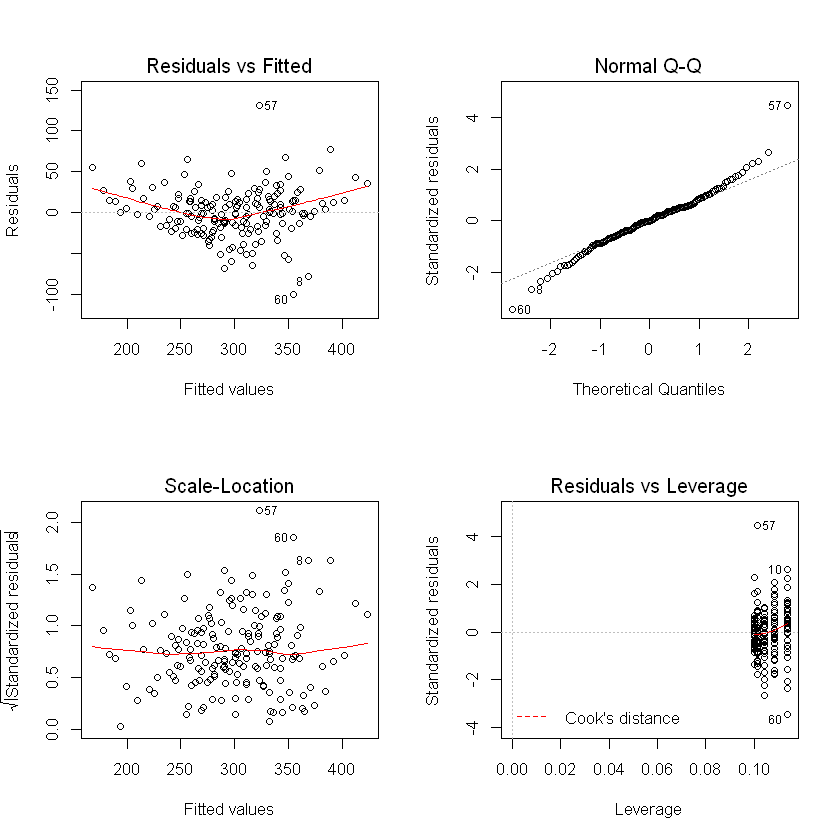

In [4]:
sleepMod1<-lm(Reaction~Days + Subject, sleepDat)
par(mfrow=c(2,2))
plot(sleepMod1)

In [6]:
install.packages("gvlma")

package 'gvlma' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpwFK61q\downloaded_packages



Call:
lm(formula = Reaction ~ Days + Subject, data = sleepDat)

Coefficients:
(Intercept)         Days   Subject309   Subject310   Subject330   Subject331  
    295.031       10.467     -126.901     -111.133      -38.912      -32.698  
 Subject332   Subject333   Subject334   Subject335   Subject337   Subject349  
    -34.832      -25.976      -46.832      -92.064       33.587      -66.299  
 Subject350   Subject351   Subject352   Subject369   Subject370   Subject371  
    -28.531      -52.036       -4.712      -36.099      -50.432      -47.150  
 Subject372  
    -24.248  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = sleepMod1) 

                    Value   p-value                   Decision
Global Stat        86.406 0.000e+00 Assumptions NOT satisfied!
Skewness            1.378 2.404e-01    Assumptions acceptable.
Kurtosis           41.186 1.384e-10 Assumptions NOT satisfied!
Link Function

,GVIF,Df,GVIF^(1/(2*Df))
Days,1,1,1
Subject,1,17,1


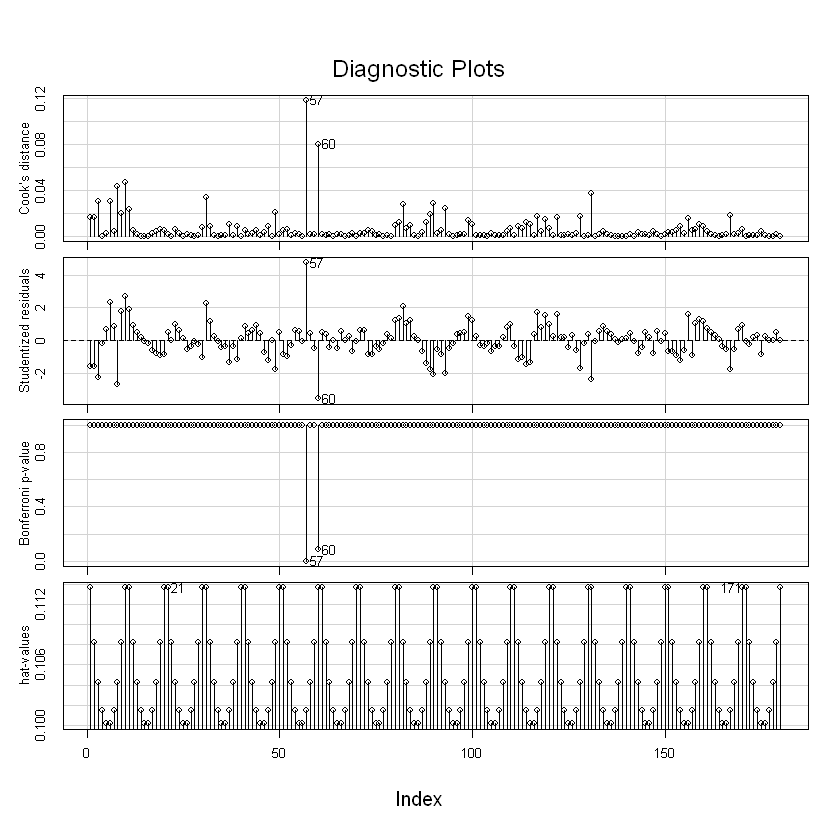

In [10]:
library(gvlma)
gvlma(sleepMod1)
library(car)
influenceIndexPlot(sleepMod1)
vif(sleepMod1)
par(mfrow=c(1,1))

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

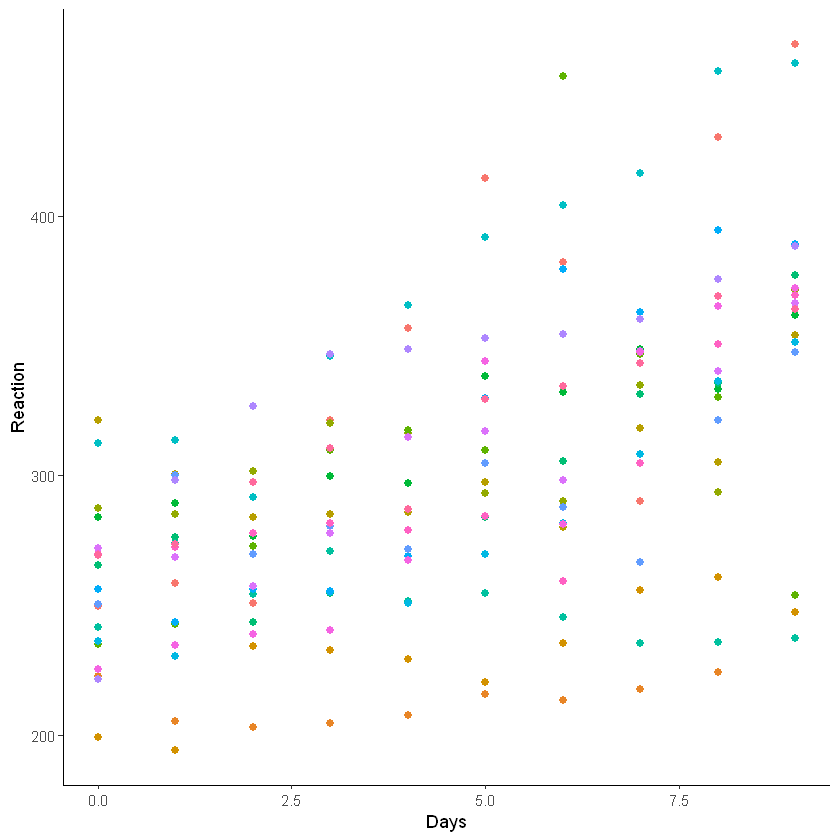

In [9]:
library(ggplot2)
ggplot(sleepDat, aes(x = Days, y = Reaction, colour = Subject)) +
  geom_point(size = 2) +
  theme_classic() +
  theme(legend.position = "none")

In [11]:
## Possible Influence/outliers, independence assumption is violated, homoscedasity may be violated. Going to try linear mixed effects models to see if they will fix the assumptions.


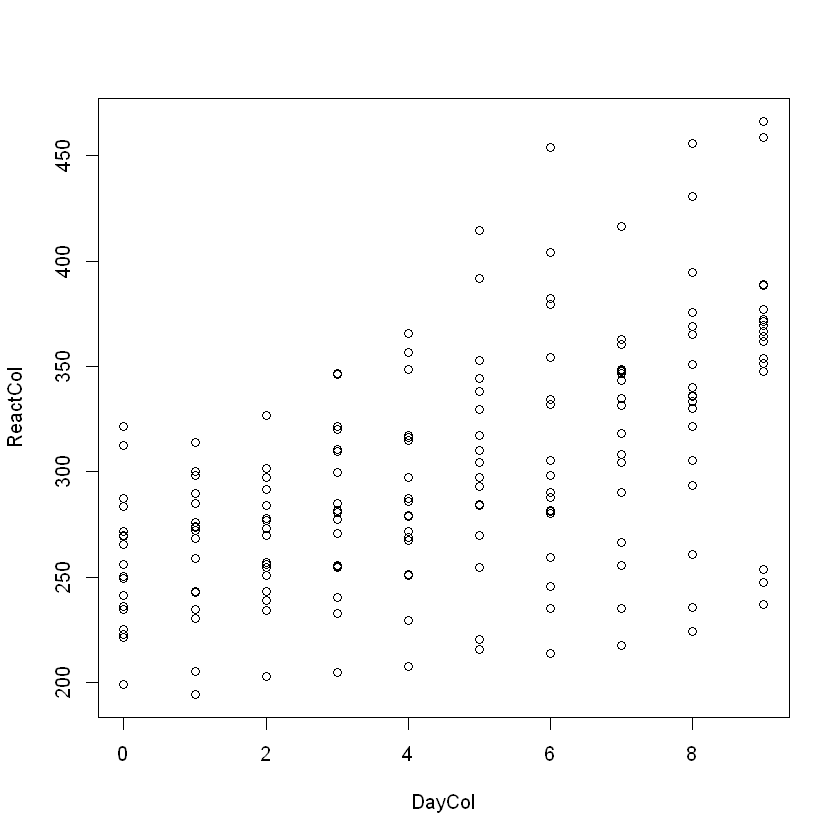

In [12]:
DayCol<-sleepDat$Days
ReactCol<-sleepDat$Reaction
plot(DayCol, ReactCol)

In [30]:
install.packages("mlmRev")
library(mlmRev)

package 'mlmRev' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpM31Mjd\downloaded_packages


Warning message:
"package 'mlmRev' was built under R version 3.6.3"
Attaching package: 'mlmRev'

The following objects are masked from 'package:nlme':

    bdf, Oxboys



In [24]:
names(sleepDat)

[1] "Reaction" "Days"     "Subject"

In [26]:
#null-model
model_null <- lmer(Reaction ~ 1 + (1 | Subject), data=sleepDat)
summary(model_null)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ 1 + (1 | Subject)
   Data: sleepDat

REML criterion at convergence: 1904.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4983 -0.5501 -0.1476  0.5123  3.3446 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 1278     35.75   
 Residual             1959     44.26   
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)   298.51       9.05   32.98

In [13]:
#random intercept, fixed predictor in individual level
sleepMod2<-lmer(Reaction ~ Days + (1|Subject), sleepDat)
summary(sleepMod2)
coef(sleepMod2)


Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (1 | Subject)
   Data: sleepDat

REML criterion at convergence: 1786.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2257 -0.5529  0.0109  0.5188  4.2506 

Random effects:
 Groups   Name        Variance Std.Dev.
 Subject  (Intercept) 1378.2   37.12   
 Residual              960.5   30.99   
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept) 251.4051     9.7467   25.79
Days         10.4673     0.8042   13.02

Correlation of Fixed Effects:
     (Intr)
Days -0.371

$Subject
    (Intercept)     Days
308    292.1888 10.46729
309    173.5556 10.46729
310    188.2965 10.46729
330    255.8115 10.46729
331    261.6213 10.46729
332    259.6263 10.46729
333    267.9056 10.46729
334    248.4081 10.46729
335    206.1230 10.46729
337    323.5878 10.46729
349    230.2089 10.46729
350    265.5165 10.46729
351    243.5429 10.46729
352    287.7835 10.46729
369    258.4415 10.46729
370    245.0424 10.46729
371    248.1108 10.46729
372    269.5209 10.46729

attr(,"class")
[1] "coef.mer"

In [22]:
 fm2 <- lmer(Reaction ~ Days + (Days || Subject), sleepstudy)

In [32]:
## random intercept, random slope

sleepMod3<-lmer(Reaction ~ Days + (Days|Subject), data= sleepDat)
summary(sleepMod3)
coef(sleepMod3)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleepDat

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4634  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 612.10   24.741       
          Days         35.07    5.922   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error t value
(Intercept)  251.405      6.825  36.838
Days          10.467      1.546   6.771

Correlation of Fixed Effects:
     (Intr)
Days -0.138

$Subject
    (Intercept)       Days
308    253.6637 19.6662617
309    211.0064  1.8476053
310    212.4447  5.0184295
330    275.0957  5.6529356
331    273.6654  7.3973743
332    260.4447 10.1951090
333    268.2456 10.2436499
334    244.1725 11.5418676
335    251.0714 -0.2848792
337    286.2956 19.0955511
349    226.1949 11.6407181
350    238.3351 17.0815038
351    255.9830  7.4520239
352    272.2688 14.0032871
369    254.6806 11.3395008
370    225.7921 15.2897709
371    252.2122  9.4791297
372    263.7197 11.7513080

attr(,"class")
[1] "coef.mer"

In [35]:
sleepDat$mygrp <- sample(1:5, size = 180, replace = TRUE)
#random intercept, individual and group level predictor

lmer(Reaction ~ Days + mygrp + (1 + Days | Subject), data=sleepDat)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + mygrp + (1 + Days | Subject)
   Data: sleepDat
REML criterion at convergence: 1740.383
Random effects:
 Groups   Name        Std.Dev. Corr
 Subject  (Intercept) 25.235       
          Days         5.885   0.05
 Residual             25.595       
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days        mygrp  
     247.96        10.41         1.20  

In [36]:
#random intercept, cross-level interaction
lmer(Reaction ~ Days * mygrp + (1 + Days | Subject), data=sleepDat)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days * mygrp + (1 + Days | Subject)
   Data: sleepDat
REML criterion at convergence: 1736.489
Random effects:
 Groups   Name        Std.Dev. Corr
 Subject  (Intercept) 25.191       
          Days         5.876   0.02
 Residual             25.408       
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days        mygrp   Days:mygrp  
   260.0935       7.4870      -2.8386       0.9423  

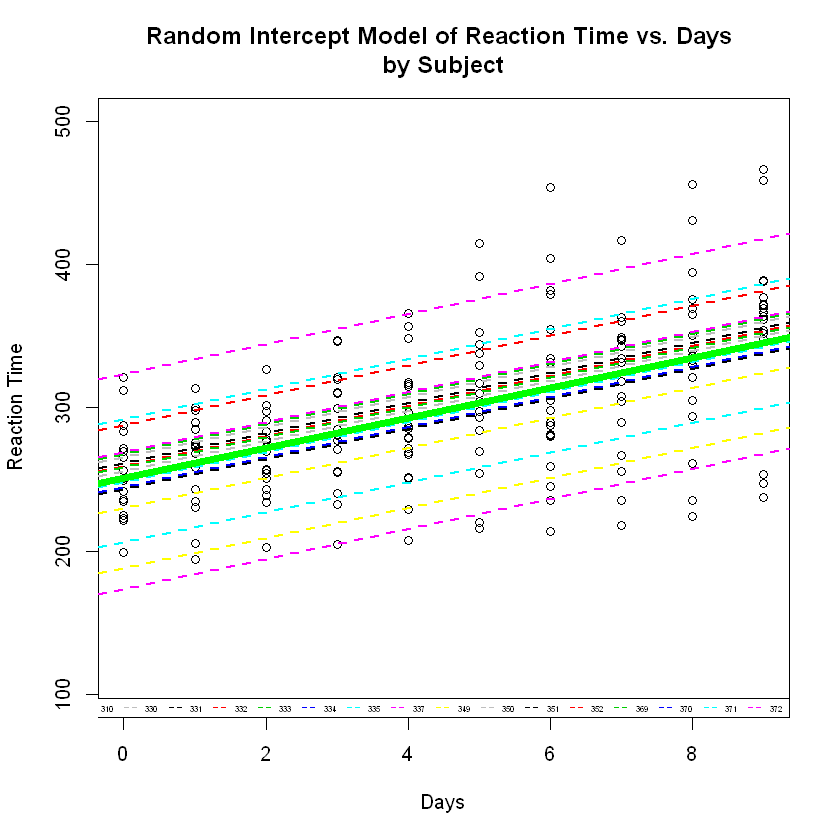

In [16]:
## Plotting Mixed Effects Models
## Random Intercept Model
fixParam<-fixef(sleepMod2)
randParamVector<-coef(sleepMod2)[["Subject"]][["(Intercept)"]]
SubjectVector<-levels(sleepDat$Subject)
plot(Reaction~Days,data=sleepDat,ylab="Reaction Time",xlab="Days", ylim=c(100, 500), main="Random Intercept Model of Reaction Time vs. Days \nby Subject")
subNum<-unique(sleepDat$Subject)
for(i in 1:18){
abline(a=randParamVector[i], b=fixParam[2],col=(20+i),lty=2,lwd=2)
}
abline(fixParam,lwd=6,col="green")
legend("bottomright", legend=SubjectVector,
       col=21:38, lty=2, cex=0.375, horiz=TRUE)

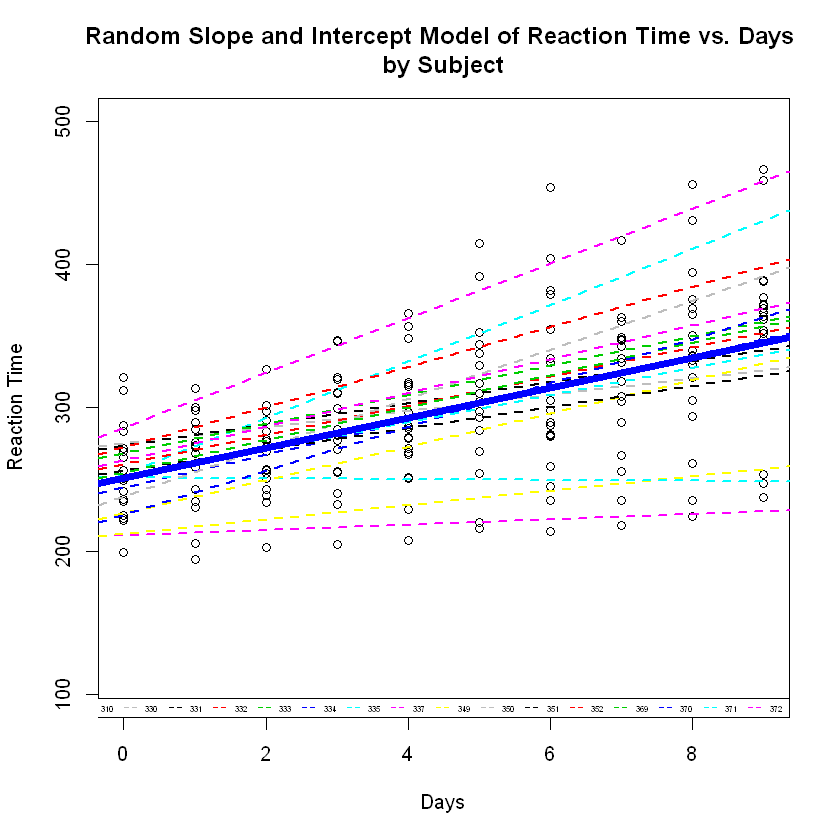

In [18]:
## Random Slope Model
fixParam<-fixef(sleepMod3)
randParamVector<-coef(sleepMod3)[["Subject"]][["(Intercept)"]]
fixParamVector<-coef(sleepMod3)[["Subject"]][["Days"]]
plot(Reaction~Days,data=sleepDat,ylab="Reaction Time",xlab="Days", ylim=c(100, 500), main="Random Slope and Intercept Model of Reaction Time vs. Days \nby Subject")
subNum<-unique(sleepDat$Subject)
for(i in 1:18){
abline(a=randParamVector[i],b=fixParamVector[i], col=(20+i), lty=2, lwd=2)
}
abline(fixParam,lwd=6,col="blue")
legend("bottomright", legend=SubjectVector,
       col=21:38, lty=2, cex=0.375, horiz=TRUE)

In [19]:
## Likelihood Ratio Test
##Random Intercept Model Fixed Effect Significance
sleepMod2<-lmer(Reaction ~ Days + (1|Subject), sleepDat, REML = FALSE)
sleepMod2.Null<-lmer(Reaction ~ 1 + (1|Subject),sleepDat,REML = FALSE)
anova(sleepMod2.Null, sleepMod2)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
sleepMod2.Null,3,1916.541,1926.12,-955.2705,1910.541,NA,NA,NA
sleepMod2,4,1802.079,1814.85,-897.0393,1794.079,116.4624,1,3.764461e-27


In [21]:
install.packages("RLRsim")

package 'RLRsim' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Swayanshu\AppData\Local\Temp\RtmpwFK61q\downloaded_packages


In [22]:
## Chi-Sq:116.46, Df=1, p-value:2.2e-16
## Days is significant for the model
## Likelihood Ratio Test
## Fixed Effect Model Random effect Significance
sleepMod2<-lmer(Reaction ~ Days + (1|Subject), sleepDat)
library(RLRsim)
exactRLRT(sleepMod2)


Warning message:
"package 'RLRsim' was built under R version 3.6.3"


	simulated finite sample distribution of RLRT.
	
	(p-value based on 10000 simulated values)

data:  
RLRT = 107.2, p-value < 2.2e-16


In [23]:
## P-Value <2.2e-16 is evidence the random effect is non zero
## Likelihood Ratio Test
## Random Slope Model
sleepMod3<-lmer(Reaction ~ Days + (Days|Subject), sleepDat, REML = FALSE)
sleepMod3.Null<-lmer(Reaction~1 + (Days|Subject), sleepDat, REML=FALSE)
sleepMod3.RanNull<-lm(Reaction~Days, sleepDat)
anova(sleepMod3.Null, sleepMod3)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
sleepMod3.Null,5,1785.476,1801.441,-887.7379,1775.476,NA,NA,NA
sleepMod3,6,1763.939,1783.097,-875.9697,1751.939,23.53654,1,1.22564e-06


In [24]:
## Chi-Square: 23.537, Df=1, P-Value:1.226e-06
## Days is significant in the model
## Restricted Likelihood Ratio Test
## Random Slope Effect test for significance
sleepMod2<-lmer(Reaction ~ Days + (1|Subject), sleepDat)
mA <- update(sleepMod2, .~. + (0 + Days|Subject))
mSlope <- update(mA, .~. - (1|Subject))
exactRLRT(mSlope, mA, m0=sleepMod2)



	simulated finite sample distribution of RLRT.
	
	(p-value based on 10000 simulated values)

data:  
RLRT = 42.796, p-value < 2.2e-16


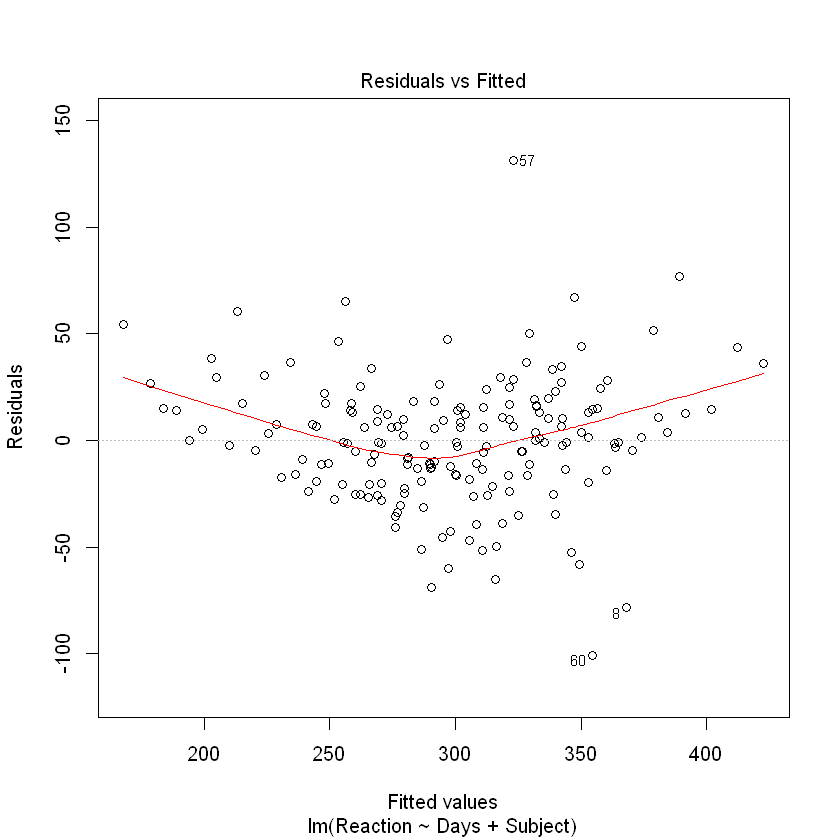

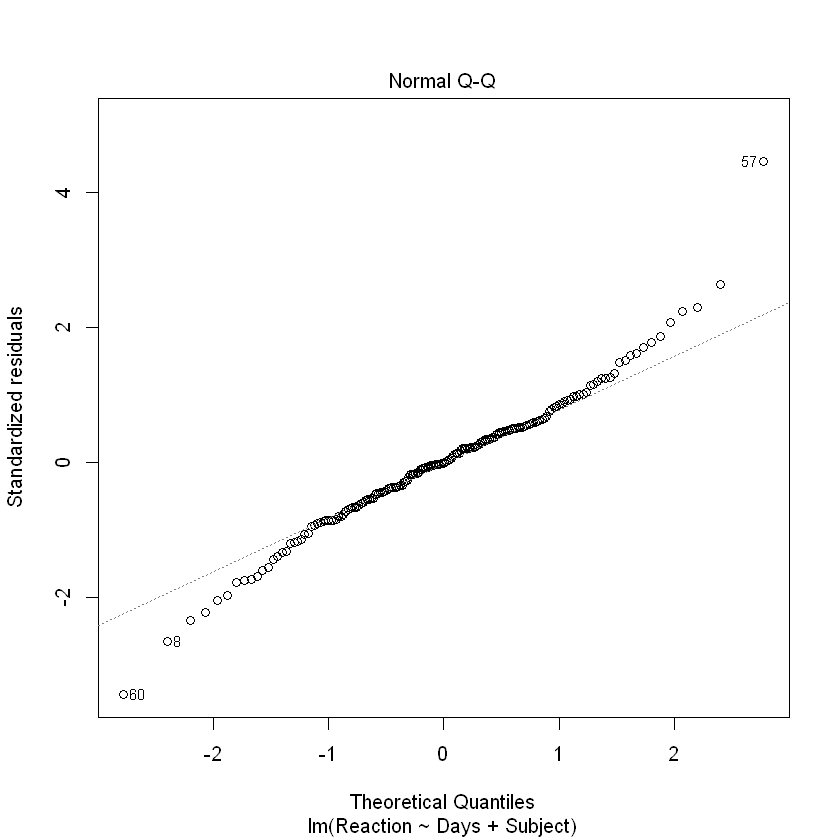

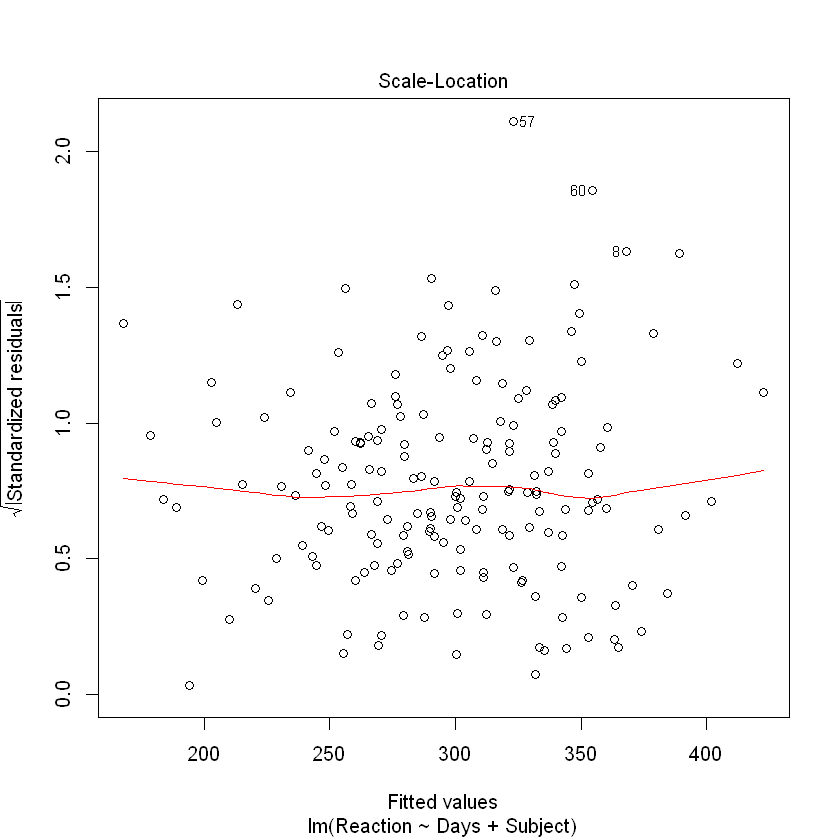

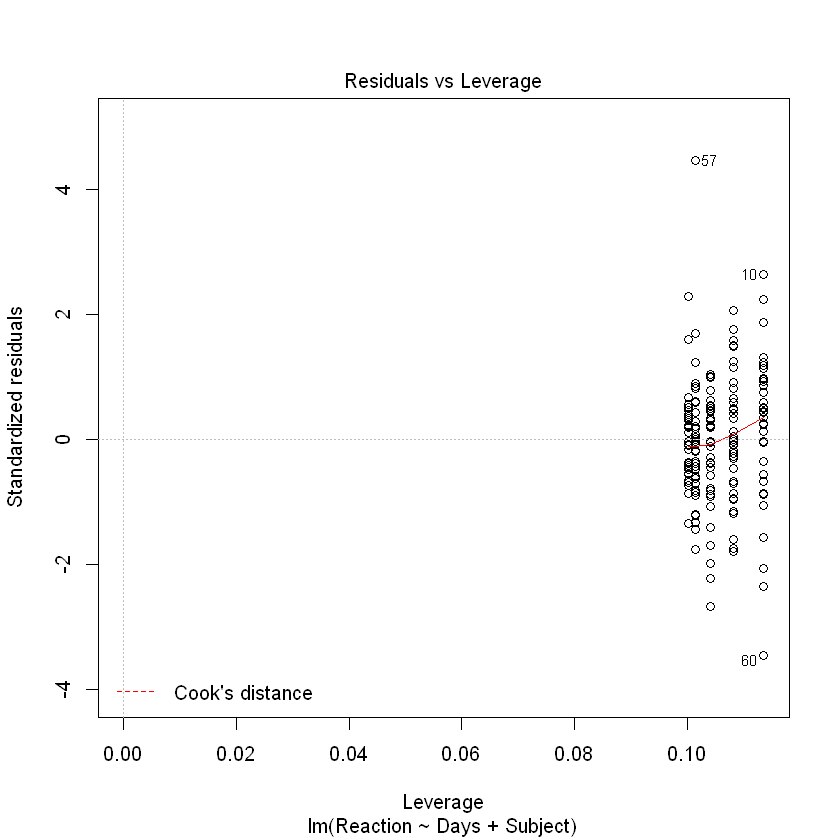

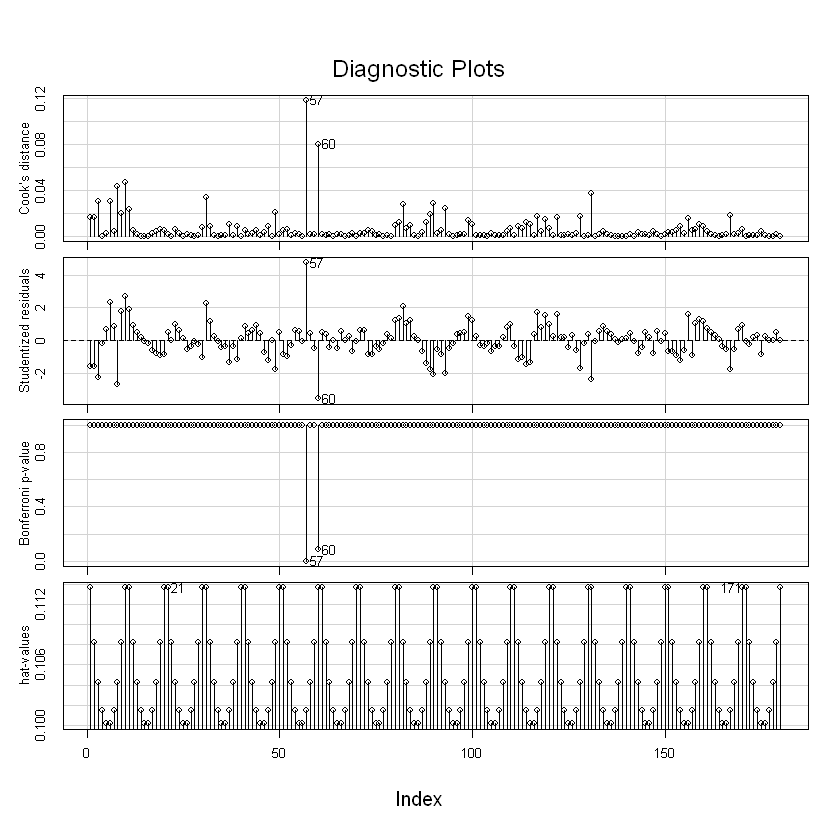

In [25]:
## Checking assumptions
plot(sleepMod1)
library(car)
influenceIndexPlot(sleepMod1)

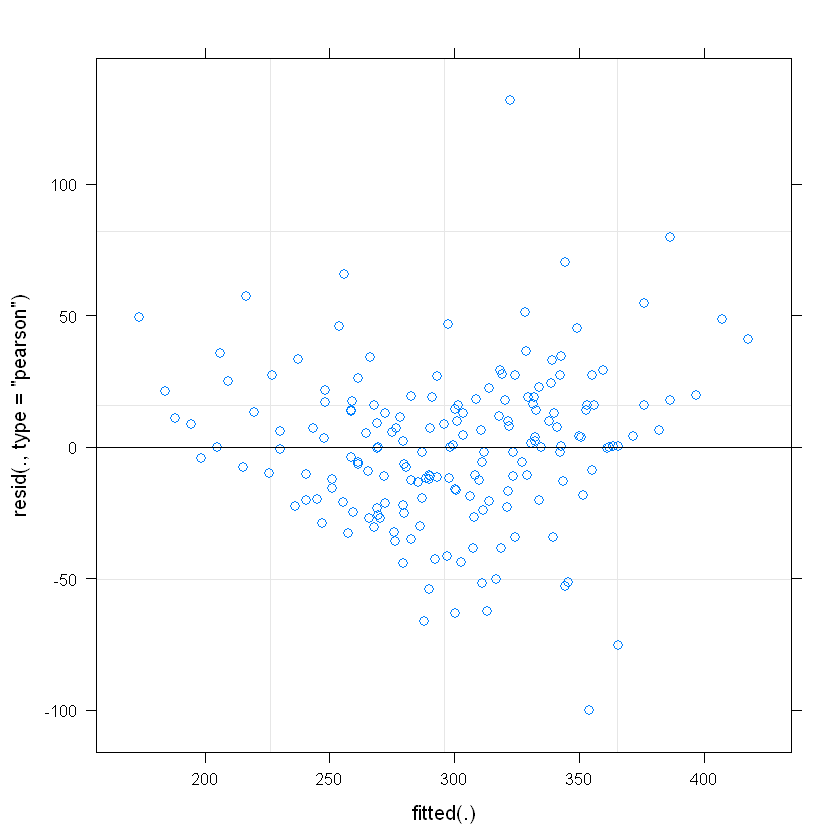

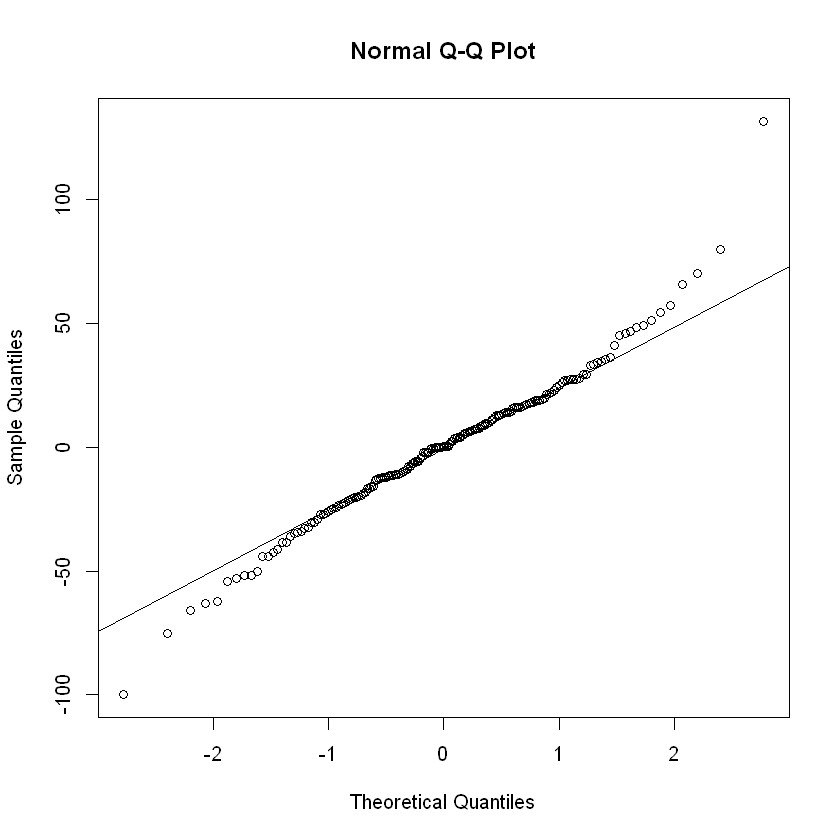

In [26]:
plot(sleepMod2)
qqnorm(resid(sleepMod2))
qqline(resid(sleepMod2))


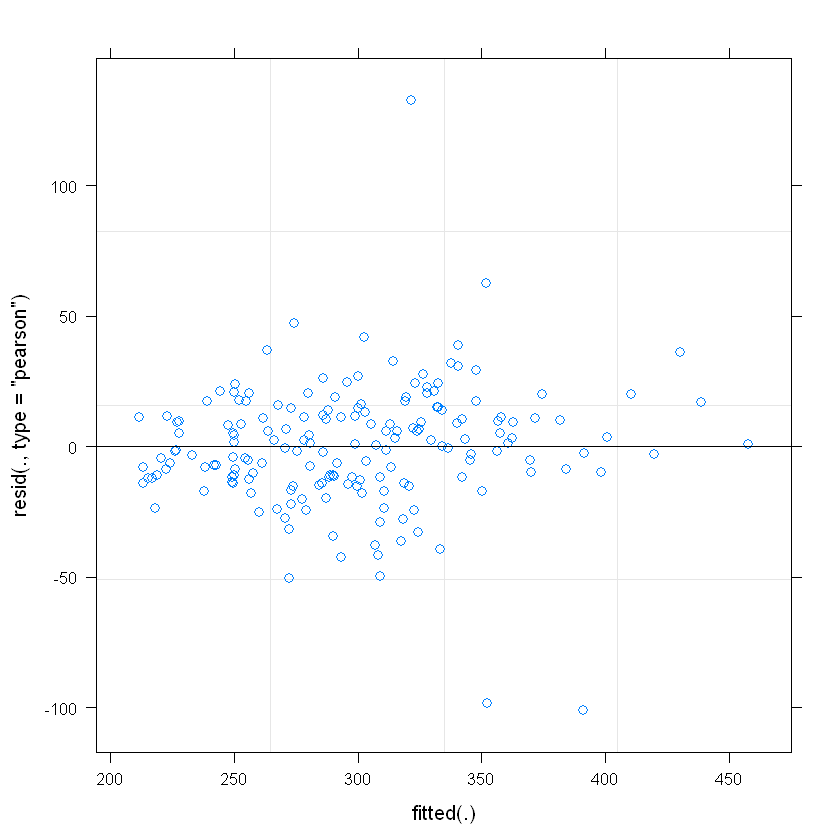

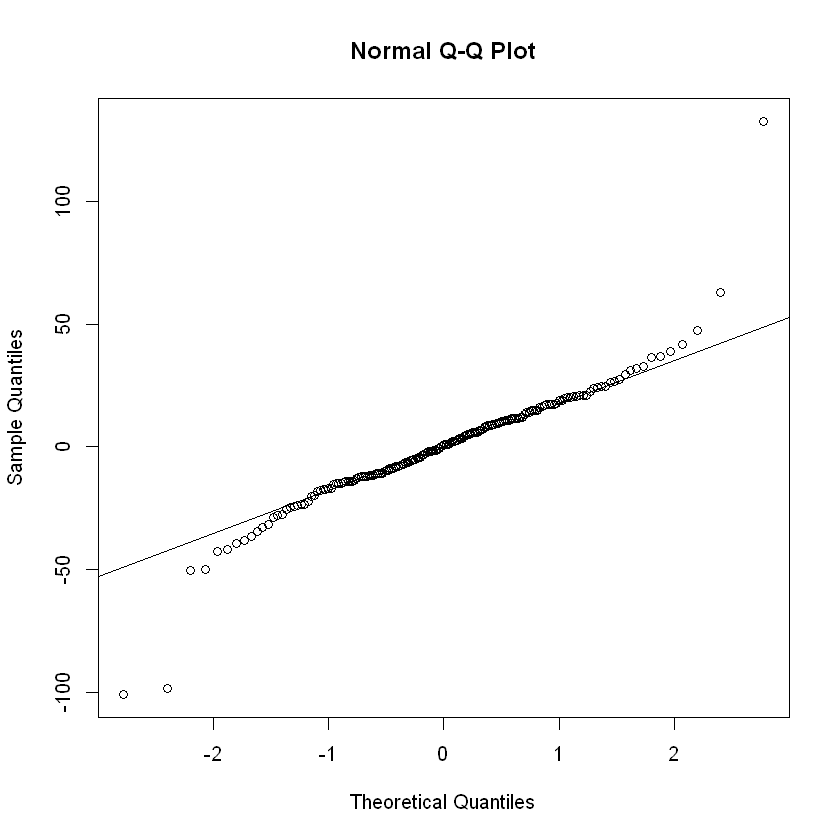

In [27]:
plot(sleepMod3)
qqnorm(resid(sleepMod3))
qqline(resid(sleepMod3))


In [43]:
predictInterval(
  fm1,
  sleepstudy,
  which = c("full", "fixed", "random", "all"),
  level = 0.8,
  n.sims = 1000,
  stat = c("median", "mean"),
  type = c("linear.prediction", "probability"),
  include.resid.var = TRUE,
  returnSims = FALSE,
  seed = NULL,
  .parallel = FALSE,
  .paropts = NULL,
  fix.intercept.variance = FALSE,
  ignore.fixed.terms = NULL
)

ERROR: Error in predictInterval(fm1, sleepstudy, which = c("full", "fixed", "random", : could not find function "predictInterval"


In [1]:
#install.packages("merTools")
library(merTools)
data(sleepstudy)
#For a one-level random intercept model
m1 <- lmer(Reaction ~ Days + (1 | Subject), sleepstudy)
(m1.er <- expectedRank(m1))
#For a one-level random intercept model with multiple random terms
m2 <- lmer(Reaction ~ Days + (Days | Subject), sleepstudy)
#ranked by the random slope on Days
(m2.er1 <- expectedRank(m2, term="Days"))

Warning message:
"package 'merTools' was built under R version 3.6.3"Loading required package: arm
Warning message:
"package 'arm' was built under R version 3.6.3"Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.6.3"Loading required package: Matrix
Loading required package: lme4
Warning message:
"package 'lme4' was built under R version 3.6.3"
arm (Version 1.11-2, built: 2020-7-27)

Working directory is C:/Users/Swayanshu

Warning message in checkMatrixPackageVersion():
"Package version inconsistency detected.
TMB was built with Matrix version 1.3.2
Current Matrix version is 1.2.17
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package"Registered S3 method overwritten by 'broom.mixed':
  method      from 
  tidy.gamlss broom


,groupFctr,groupLevel,term,estimate,std.error,ER,pctER
2,Subject,308,Intercept,40.783710,89.78829,16.505317,89
3,Subject,309,Intercept,-77.849554,89.78829,1.143216,4
4,Subject,310,Intercept,-63.108567,89.78829,1.956973,8
5,Subject,330,Intercept,4.406442,89.78829,9.733335,51
6,Subject,331,Intercept,10.216189,89.78829,11.315372,60
7,Subject,332,Intercept,8.221238,89.78829,10.778396,57
8,Subject,333,Intercept,16.500494,89.78829,12.891828,69
9,Subject,334,Intercept,-2.996981,89.78829,7.775808,40
10,Subject,335,Intercept,-45.282127,89.78829,2.943212,14
11,Subject,337,Intercept,72.182686,89.78829,17.986611,97


,groupFctr,groupLevel,term,estimate,std.error,ER,pctER
2,Subject,308,Days,9.1989758,5.312283,17.193775,93
3,Subject,309,Days,-8.6196806,5.312283,2.143182,9
4,Subject,310,Days,-5.4488565,5.312283,3.955480,19
5,Subject,330,Days,-4.8143503,5.312283,4.436360,22
6,Subject,331,Days,-3.0699116,5.312283,5.992067,31
7,Subject,332,Days,-0.2721770,5.312283,9.092286,48
8,Subject,333,Days,-0.2236361,5.312283,9.149805,48
9,Subject,334,Days,1.0745816,5.312283,10.683791,57
10,Subject,335,Days,-10.7521652,5.312283,1.363832,5
11,Subject,337,Days,8.6282652,5.312283,16.931028,91


In [2]:
lmer(Reaction ~ 1 + (1 | Subject), data=sleepstudy)

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ 1 + (1 | Subject)
   Data: sleepstudy
REML criterion at convergence: 1904.326
Random effects:
 Groups   Name        Std.Dev.
 Subject  (Intercept) 35.75   
 Residual             44.26   
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)  
      298.5  

In [47]:
#ranked by the random intercept
(m2.er2 <- expectedRank(m2, term="int"))
#For a two-level model with random intercepts
m3 <- lmer(y ~ service * dept + (1|s) + (1|d), InstEval)
#Ranked by the random intercept on 's'
(m3.er1 <- expectedRank(m3, groupFctr="s", term="Intercept"))

,groupFctr,groupLevel,term,estimate,std.error,ER,pctER
2,Subject,308,Intercept,2.2585509,145.7056,9.634715,51
3,Subject,309,Intercept,-40.3987381,145.7056,1.963880,8
4,Subject,310,Intercept,-38.9604090,145.7056,2.103740,9
5,Subject,330,Intercept,23.6906196,145.7056,14.986408,80
6,Subject,331,Intercept,22.2603126,145.7056,14.686185,79
7,Subject,332,Intercept,9.0395679,145.7056,11.439297,61
8,Subject,333,Intercept,16.8405086,145.7056,13.441698,72
9,Subject,334,Intercept,-7.2326151,145.7056,7.263233,38
10,Subject,335,Intercept,-0.3336684,145.7056,8.959311,47
11,Subject,337,Intercept,34.8904868,145.7056,16.855604,91


,groupFctr,groupLevel,term,estimate,std.error,ER,pctER
2,s,1,Intercept,0.147354355,0.08121060,1881.5973,63
3,s,2,Intercept,-0.047151377,0.09176121,1359.4819,46
4,s,3,Intercept,0.323988081,0.05187447,2356.4560,79
5,s,4,Intercept,0.249386677,0.06613193,2158.1394,73
6,s,5,Intercept,0.038289579,0.08129381,1589.7392,53
7,s,6,Intercept,0.115500394,0.06619803,1810.8885,61
8,s,7,Intercept,0.469190234,0.06979987,2582.6855,87
9,s,8,Intercept,0.189000363,0.07701462,1992.9746,67
10,s,9,Intercept,0.424963088,0.06332983,2525.1897,85
11,s,10,Intercept,0.311933975,0.05213608,2329.6498,78


In [8]:
(CorrelatedRE <- lmer(Reaction ~ 1 + Days + (1 + Days|Subject), sleepstudy, REML = 0))

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Reaction ~ 1 + Days + (1 + Days | Subject)
   Data: sleepstudy
      AIC       BIC    logLik  deviance  df.resid 
1763.9393 1783.0971 -875.9697 1751.9393       174 
Random effects:
 Groups   Name        Std.Dev. Corr
 Subject  (Intercept) 23.780       
          Days         5.717   0.08
 Residual             25.592       
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days  
     251.41        10.47  

In [9]:
 (UncorrelatedRE <- lmer(Reaction ~ 1 + Days + (1|Subject) + (0+Days|Subject),sleepstudy, REML = 0))


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Reaction ~ 1 + Days + (1 | Subject) + (0 + Days | Subject)
   Data: sleepstudy
      AIC       BIC    logLik  deviance  df.resid 
1762.0033 1777.9680 -876.0016 1752.0033       175 
Random effects:
 Groups    Name        Std.Dev.
 Subject   (Intercept) 24.172  
 Subject.1 Days         5.799  
 Residual              25.556  
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days  
     251.41        10.47  

In [10]:
anova(UncorrelatedRE,CorrelatedRE)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
UncorrelatedRE,5,1762.003,1777.968,-876.0016,1752.003,NA,NA,NA
CorrelatedRE,6,1763.939,1783.097,-875.9697,1751.939,0.06391066,1,0.8004185


In [11]:
parsedFormula <- lFormula(formula = Reaction ~ Days + (Days | Subject),data = sleepstudy)

In [12]:
 devianceFunction <- do.call(mkLmerDevfun, parsedFormula)

In [13]:
optimizerOutput <- optimizeLmer(devianceFunction)

In [14]:
mkMerMod(rho = environment(devianceFunction), opt = optimizerOutput, reTrms = parsedFormula$reTrms, fr = parsedFormula$fr)

Linear mixed model fit by REML ['lmerMod']
REML criterion at convergence: 1743.628
Random effects:
 Groups   Name        Std.Dev. Corr
 Subject  (Intercept) 24.741       
          Days         5.922   0.07
 Residual             25.592       
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days  
     251.41        10.47  

In [16]:
fm1 <- lmer(Reaction ~ Days + (Days | Subject), sleepstudy)
fm1

Linear mixed model fit by REML ['lmerMod']
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleepstudy
REML criterion at convergence: 1743.628
Random effects:
 Groups   Name        Std.Dev. Corr
 Subject  (Intercept) 24.741       
          Days         5.922   0.07
 Residual             25.592       
Number of obs: 180, groups:  Subject, 18
Fixed Effects:
(Intercept)         Days  
     251.41        10.47  

In [23]:
library(dplyr)
knitr::opts_chunk$set(echo = TRUE)
asp_facet <- 1

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [25]:
library(lme4)
library(dplyr)
library(tibble)
# Convert to tibble for better printing. Convert factors to strings
sleepstudy <- sleepstudy %>% 
  as_tibble() %>% 
  mutate(Subject = as.character(Subject))
# Add two fake participants
df_sleep <- bind_rows(
  sleepstudy,
  tibble(Reaction = c(286, 288), Days = 0:1, Subject = "374"),
  tibble(Reaction = 245, Days = 0, Subject = "373"))


Warning message:
"package 'ggplot2' was built under R version 3.6.3"`geom_smooth()` using formula 'y ~ x'


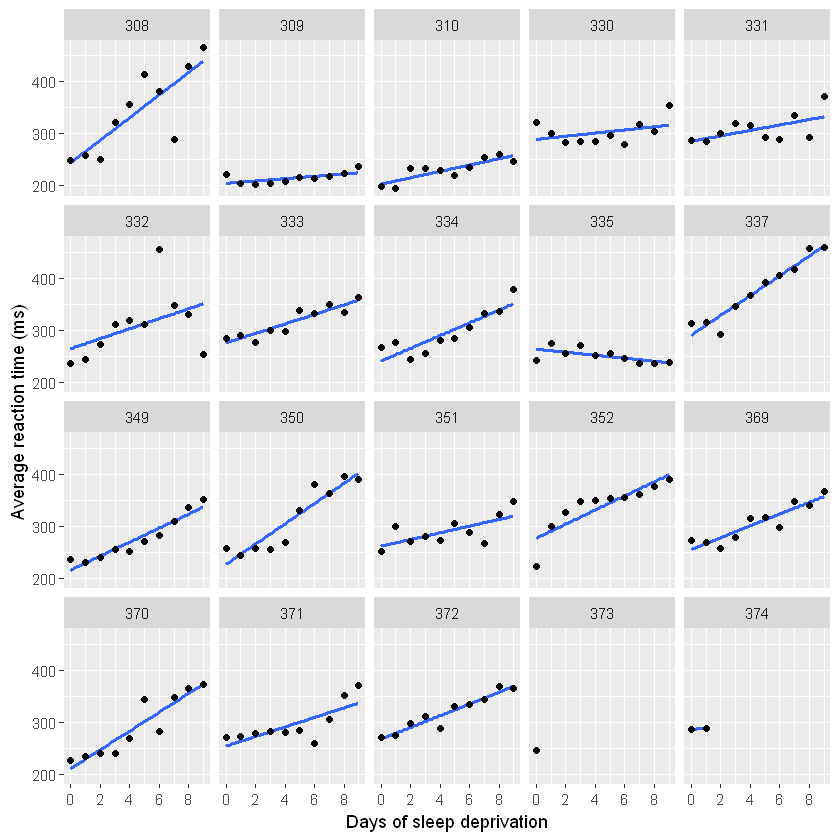

In [26]:
library(ggplot2)
xlab <- "Days of sleep deprivation"
ylab <- "Average reaction time (ms)"
ggplot(df_sleep) + 
  aes(x = Days, y = Reaction) + 
  stat_smooth(method = "lm", se = FALSE) +
  # Put the points on top of lines
  geom_point() +
  facet_wrap("Subject") +
  labs(x = xlab, y = ylab) + 
  # We also need to help the x-axis, so it doesn't 
  # create gridlines/ticks on 2.5 days
  scale_x_continuous(breaks = 0:4 * 2)

In [27]:
df_no_pooling <- lmList(Reaction ~ Days | Subject, df_sleep) %>% 
  coef() %>% 
  # Subject IDs are stored as row-names. Make them an explicit column
  rownames_to_column("Subject") %>% 
  rename(Intercept = `(Intercept)`, Slope_Days = Days) %>% 
  add_column(Model = "No pooling") %>% 
  # Remove the participant who only had one data-point
  filter(Subject != "373")
head(df_no_pooling)

Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised column: `(offset)`."Warning message:
"Unknown or uninitialised column: `(weights)`."Warning message:
"Unknown or uninitialised colu

Subject,Intercept,Slope_Days,Model
308,244.1927,21.764702,No pooling
309,205.0549,2.261785,No pooling
310,203.4842,6.114899,No pooling
330,289.6851,3.008073,No pooling
331,285.7390,5.266019,No pooling
332,264.2516,9.566768,No pooling


In [28]:
# Fit a model on all the data pooled together
m_pooled <- lm(Reaction ~ Days, df_sleep) 
# Repeat the intercept and slope terms for each participant
df_pooled <- tibble(
  Model = "Complete pooling",
  Subject = unique(df_sleep$Subject),
  Intercept = coef(m_pooled)[1], 
  Slope_Days = coef(m_pooled)[2]
)
head(df_pooled)

Model,Subject,Intercept,Slope_Days
Complete pooling,308,252.3207,10.32766
Complete pooling,309,252.3207,10.32766
Complete pooling,310,252.3207,10.32766
Complete pooling,330,252.3207,10.32766
Complete pooling,331,252.3207,10.32766
Complete pooling,332,252.3207,10.32766


Warning message in pal_name(palette, type):
"Unknown palette Dark1"

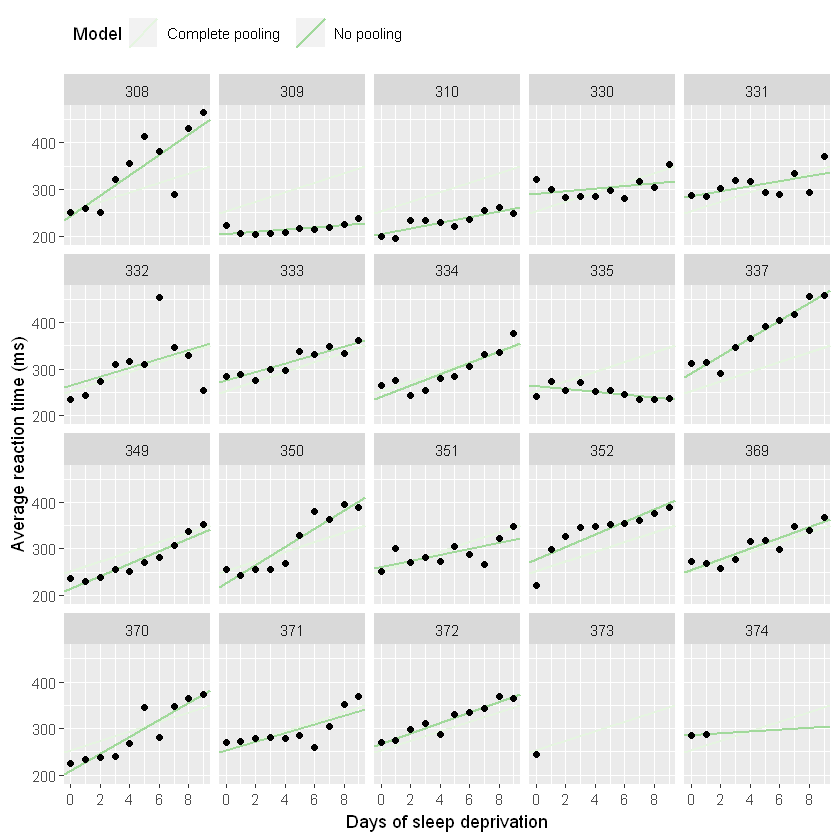

In [32]:
# Join the raw data so we can use plot the points and the lines.
df_models <- bind_rows(df_pooled, df_no_pooling) %>% 
  left_join(df_sleep, by = "Subject")
p_model_comparison <- ggplot(df_models) + 
  aes(x = Days, y = Reaction) + 
  # Set the color mapping in this layer so the points don't get a color
  geom_abline(
    aes(intercept = Intercept, slope = Slope_Days, color = Model),
    size = .75
  ) + 
  geom_point() +
  facet_wrap("Subject") +
  labs(x = xlab, y = ylab) + 
  scale_x_continuous(breaks = 0:4 * 2) + 
  # Fix the color palette 
  scale_color_brewer(palette = "Dark1") + 
  theme(legend.position = "top", legend.justification = "left")
p_model_comparison

In [34]:

m <- lmer(Reaction ~ 1 + Days + (1 + Days | Subject), df_sleep)
arm::display(m)


lmer(formula = Reaction ~ 1 + Days + (1 + Days | Subject), data = df_sleep)
            coef.est coef.se
(Intercept) 252.54     6.43 
Days         10.45     1.54 

Error terms:
 Groups   Name        Std.Dev. Corr 
 Subject  (Intercept) 24.14         
          Days         5.92    0.07 
 Residual             25.48         
---
number of obs: 183, groups: Subject, 20
AIC = 1783.4, DIC = 1787.8
deviance = 1779.6 


In [35]:
# Make a dataframe with the fitted effects
df_partial_pooling <- coef(m)[["Subject"]] %>% 
  rownames_to_column("Subject") %>% 
  as_tibble() %>% 
  rename(Intercept = `(Intercept)`, Slope_Days = Days) %>% 
  add_column(Model = "Partial pooling")
head(df_partial_pooling)

Subject,Intercept,Slope_Days,Model
308,253.9478,19.626434,Partial pooling
309,211.7331,1.731916,Partial pooling
310,213.1582,4.906151,Partial pooling
330,275.1425,5.643601,Partial pooling
331,273.7286,7.386273,Partial pooling
332,260.6504,10.163257,Partial pooling


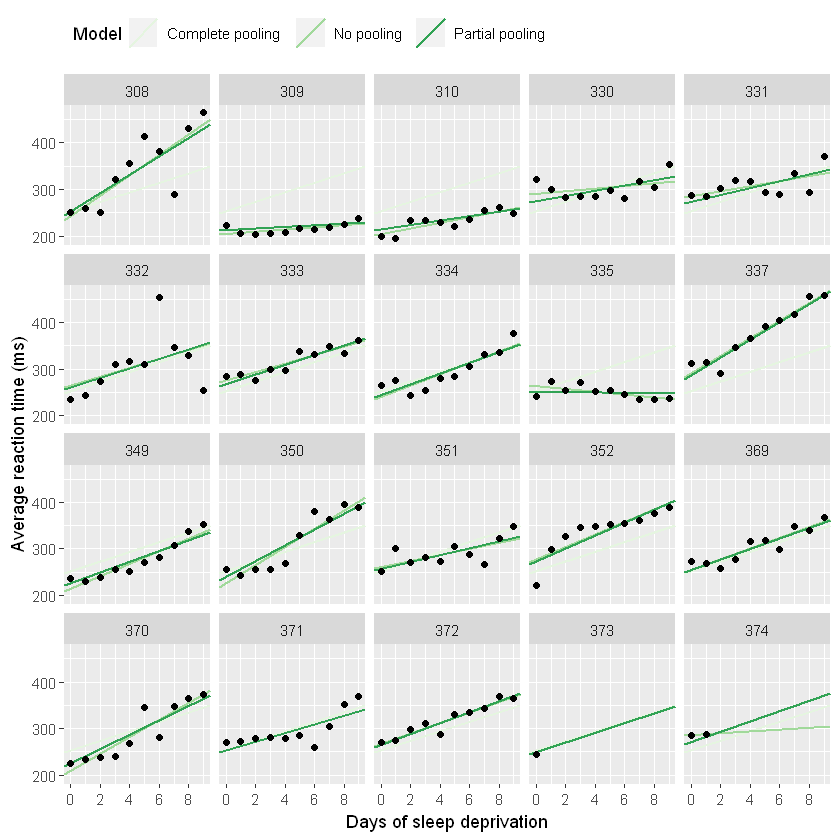

In [36]:
df_models <- bind_rows(df_pooled, df_no_pooling, df_partial_pooling) %>% 
  left_join(df_sleep, by = "Subject")
# Replace the data-set of the last plot
p_model_comparison %+% df_models

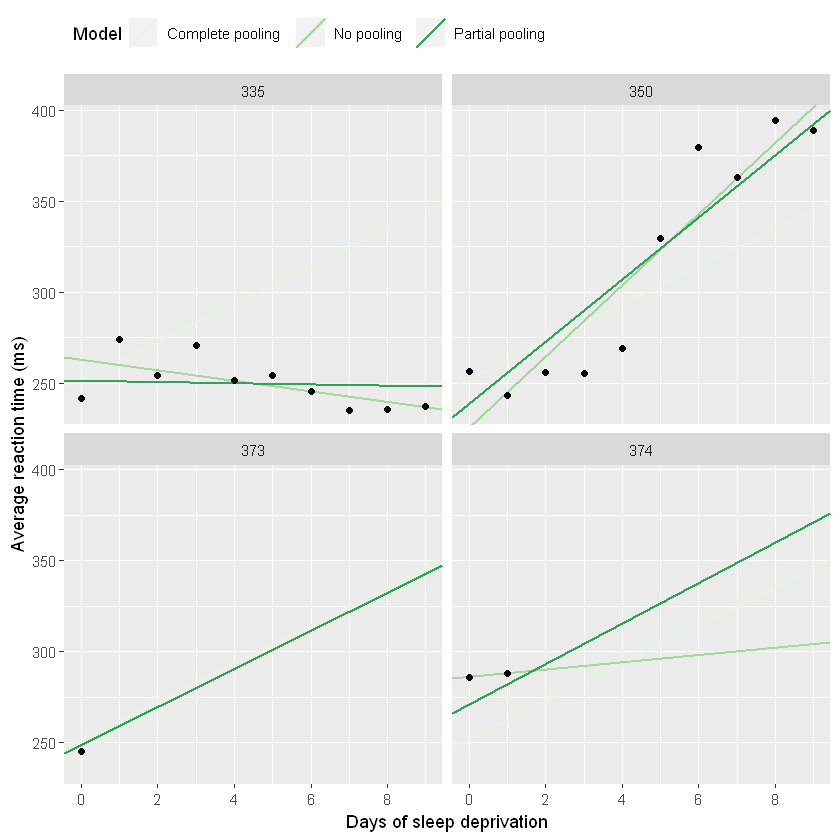

In [37]:
df_zoom <- df_models %>% 
  filter(Subject %in% c("335", "350", "373", "374"))
p_model_comparison %+% df_zoom

Model,Intercept,Slope_Days
Complete pooling,252.3207,10.32766
Partial pooling (average),252.5426,10.45212


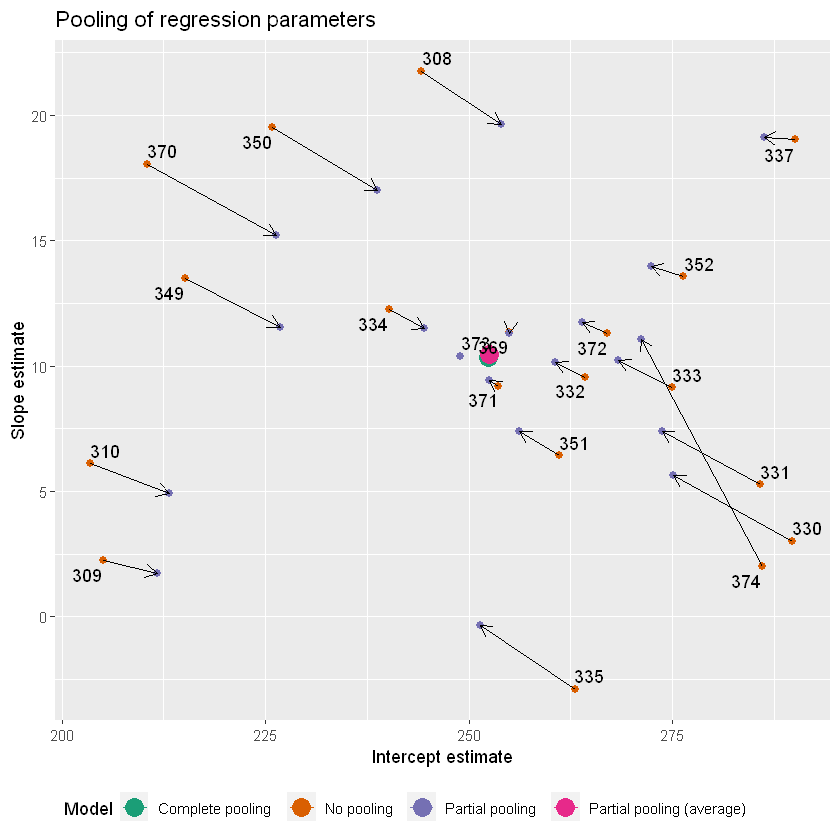

In [39]:
df_fixef <- tibble(
  Model = "Partial pooling (average)",
  Intercept = fixef(m)[1],
  Slope_Days = fixef(m)[2]
)
df_gravity <- df_pooled %>% 
  distinct(Model, Intercept, Slope_Days) %>% 
  bind_rows(df_fixef)
df_gravity
df_pulled <- bind_rows(df_no_pooling, df_partial_pooling)
ggplot(df_pulled) + 
  aes(x = Intercept, y = Slope_Days, color = Model) + 
  geom_point(size = 2) + 
  geom_point(data = df_gravity, size = 5) + 
  # Draw an arrow connecting the observations between models
  geom_path(
    aes(group = Subject, color = NULL), 
    arrow = arrow(length = unit(.02, "npc"))
  ) + 
  # Use ggrepel to jitter the labels away from the points
  ggrepel::geom_text_repel(
    aes(label = Subject, color = NULL), 
    data = df_no_pooling
  ) + 
  # Don't forget 373
  ggrepel::geom_text_repel(
    aes(label = Subject, color = NULL), 
    data = filter(df_partial_pooling, Subject == "373")
  ) + 
  theme(legend.position = "bottom", legend.justification = "left") + 
  ggtitle("Pooling of regression parameters") + 
  xlab("Intercept estimate") + 
  ylab("Slope estimate") + 
  scale_color_brewer(palette = "Dark2") 

In [40]:
# Extract the matrix
cov_mat <- VarCorr(m)[["Subject"]]
# Strip off some details so that just the useful part is printed
attr(cov_mat, "stddev") <- NULL
attr(cov_mat, "correlation") <- NULL
cov_mat

,(Intercept),Days
(Intercept),582.717345,9.897673
Days,9.897673,35.033088


In [41]:
library(ellipse)
# Helper function to make a data-frame of ellipse points that 
# includes the level as a column
make_ellipse <- function(cov_mat, center, level) {
  ellipse(cov_mat, centre = center, level = level) %>%
    as.data.frame() %>%
    add_column(level = level) %>% 
    as_tibble()
}
center <- fixef(m)
levels <- c(.1, .3, .5, .7, .9)
# Create an ellipse dataframe for each of the levels defined 
# above and combine them
df_ellipse <- levels %>%
  purrr::map_df(~ make_ellipse(cov_mat, center, level = .x)) %>% 
  rename(Intercept = `(Intercept)`, Slope_Days = Days)
df_ellipse

Warning message:
"package 'ellipse' was built under R version 3.6.3"
Attaching package: 'ellipse'

The following object is masked from 'package:graphics':

    pairs



Intercept,Slope_Days,level
260.6449,12.43878,0.1
260.1492,12.55233,0.1
259.6228,12.65743,0.1
259.0679,12.75365,0.1
258.4867,12.84060,0.1
257.8816,12.91793,0.1
257.2550,12.98534,0.1
256.6095,13.04254,0.1
255.9475,13.08932,0.1
255.2719,13.12547,0.1


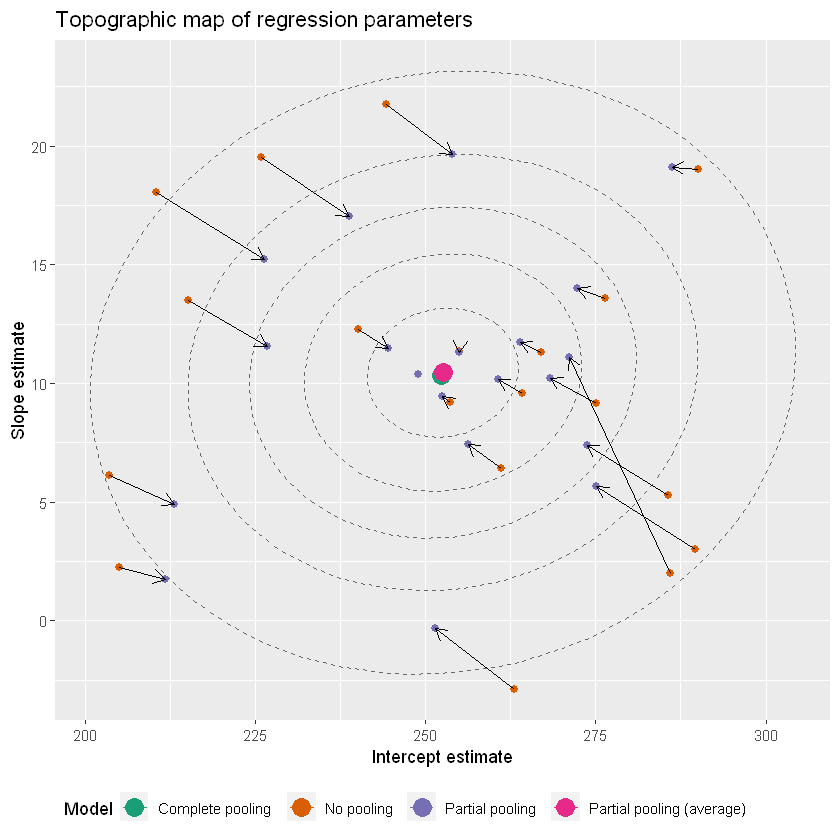

In [42]:
ggplot(df_pulled) + 
  aes(x = Intercept, y = Slope_Days, color = Model) + 
  # Draw contour lines from the distribution of effects
  geom_path(
    aes(group = level, color = NULL), 
    data = df_ellipse, 
    linetype = "dashed", 
    color = "grey40"
  ) + 
  geom_point(data = df_gravity, size = 5) + 
  geom_point(size = 2) + 
  geom_path(
    aes(group = Subject, color = NULL), 
    arrow = arrow(length = unit(.02, "npc"))
  ) + 
  theme(legend.position = "bottom", legend.justification = "left") + 
  ggtitle("Topographic map of regression parameters") + 
  xlab("Intercept estimate") + 
  ylab("Slope estimate") + 
  scale_color_brewer(palette = "Dark2") 

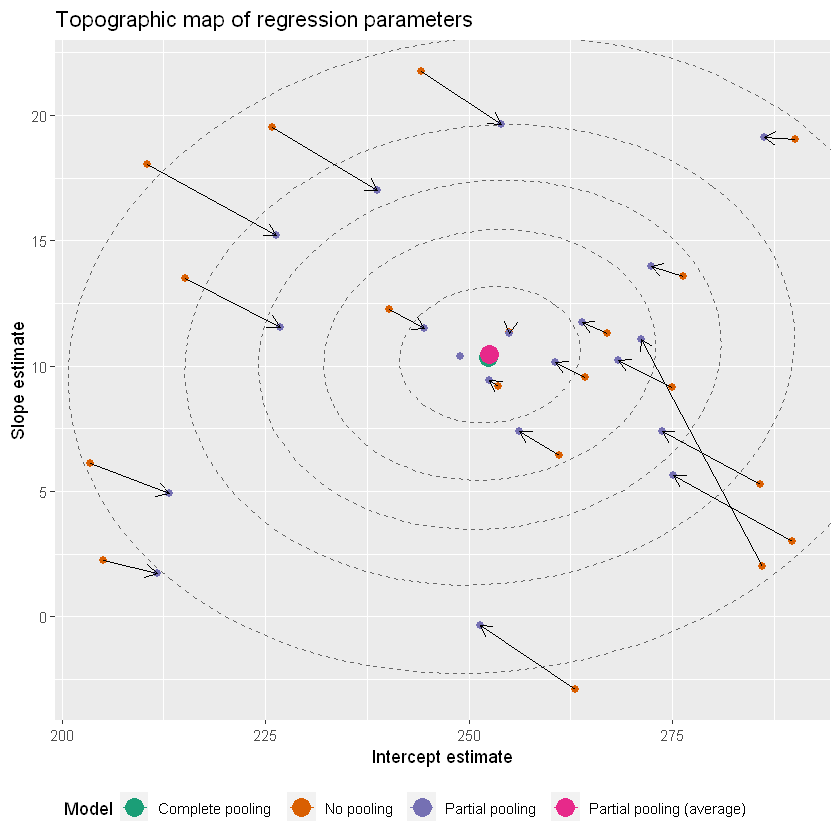

In [43]:
last_plot() +
  coord_cartesian(
    xlim = range(df_pulled$Intercept), 
    ylim = range(df_pulled$Slope_Days),
    expand = TRUE
  ) 

https://github.com/tjmahr/tjmahr.github.io/blob/master/_R/2017-06-22-plotting-partial-pooling-in-mixed-effects-models.Rmd

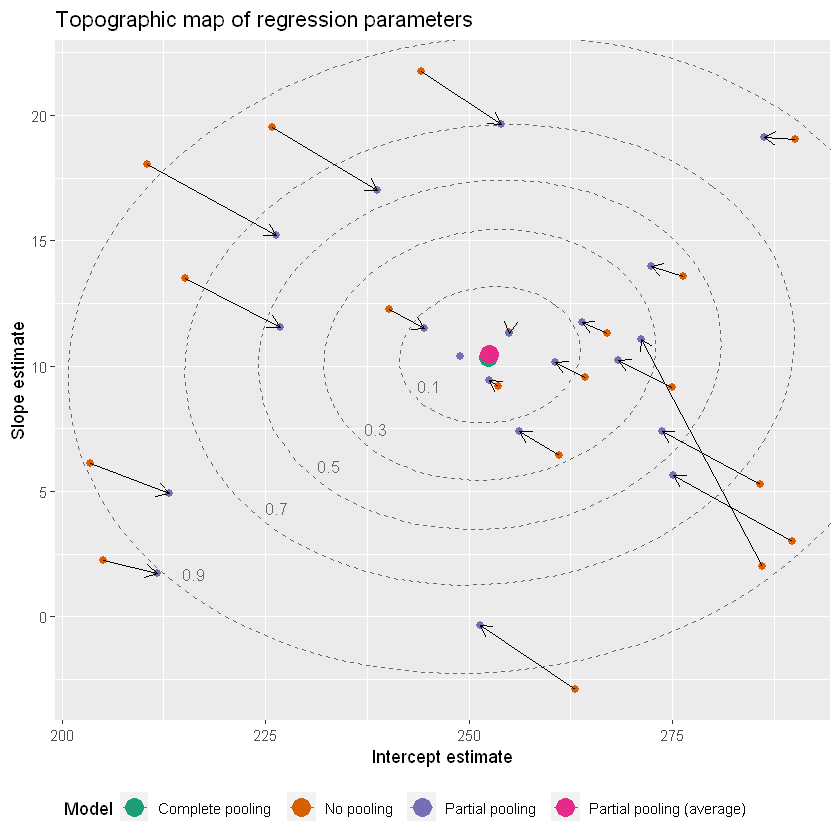

In [44]:
# Euclidean distance
contour_dist <- function(xs, ys, center_x, center_y) {
  x_diff <- (center_x - xs) ^ 2
  y_diff <- (center_y - ys) ^ 2
  sqrt(x_diff + y_diff)
}
# Find the point to label in each ellipse.
df_label_locations <- df_ellipse %>% 
  group_by(level) %>%
  filter(
    Intercept < quantile(Intercept, .25), 
    Slope_Days < quantile(Slope_Days, .25)
  ) %>% 
  # Compute distance from center.
  mutate(
    dist = contour_dist(Intercept, Slope_Days, fixef(m)[1], fixef(m)[2])
  ) %>% 
  # Keep smallest values.
  top_n(-1, wt = dist) %>% 
  ungroup()
# Tweak the last plot one more time!
last_plot() +
  geom_text(
    aes(label = level, color = NULL), 
    data = df_label_locations, 
    nudge_x = .5, 
    nudge_y = .8, 
    size = 3.5, 
    color = "grey40"
  )